<a href="https://colab.research.google.com/github/hiu04/Data-Science/blob/main/A2_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Statistical Testing and A/B Testing

*Author: Xiaoyu Ma*


*Date: Jun 13 2023*

**Scenario**

You work for a mobile application as a Product Analyst, and you're testing changes to an existing feature. You would like to release changes to a key feature and have prepared 2 possible variants.  You've been running an experiment for 2 weeks, and now have some data with the experiment results. Specifically, you have the Click-Through-Rate (CTR) and Average Time Spent, in minutes, for each feature. The CTR means that the user is moving through different parts of the feature. A CTR of 1 would indicate the user has fully clicked on everything in a feature, while a CTR of 0 means they have not clicked anything. 


## Loading data and packages

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [3]:
# import data
df = pd.read_csv("/content/experiment_dataset.csv")
df

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
...,...,...,...,...,...,...,...
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423


In [4]:
# set first column as index and update
df = df.set_index("Unnamed: 0")

In [5]:
# rename the Time Spent column and update
df = df.rename(columns={'Time Spent': 'Time_Spent'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1000 non-null   int64  
 1   Location    1000 non-null   object 
 2   Device      1000 non-null   object 
 3   Variant     1000 non-null   object 
 4   Time_Spent  1000 non-null   float64
 5   CTR         1000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 54.7+ KB


In [7]:
df['Variant'].value_counts()

Control      340
Variant B    330
Variant A    330
Name: Variant, dtype: int64

## 1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

### Variant 

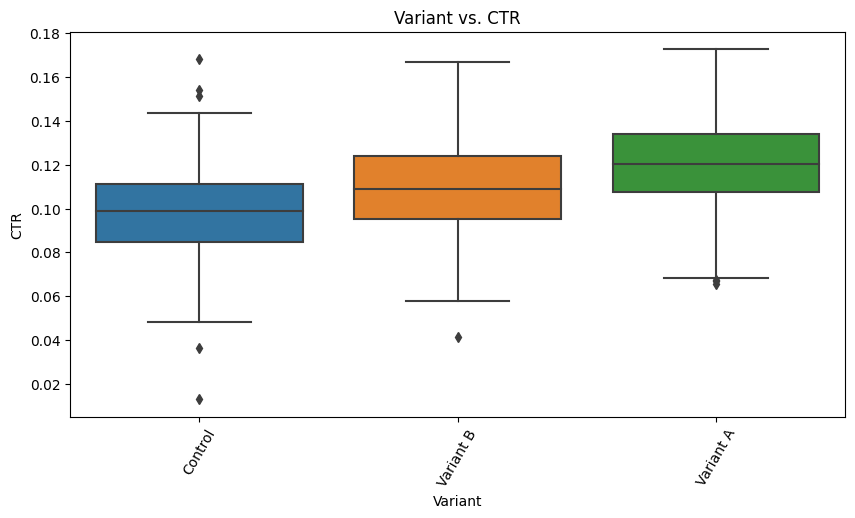

In [8]:
# Variant vs. CTR
plt.figure(figsize=(10,5))
sns.boxplot(x='Variant', y='CTR', data=df)
plt.tick_params(axis='x', rotation=60)
plt.title('Variant vs. CTR')
plt.show()

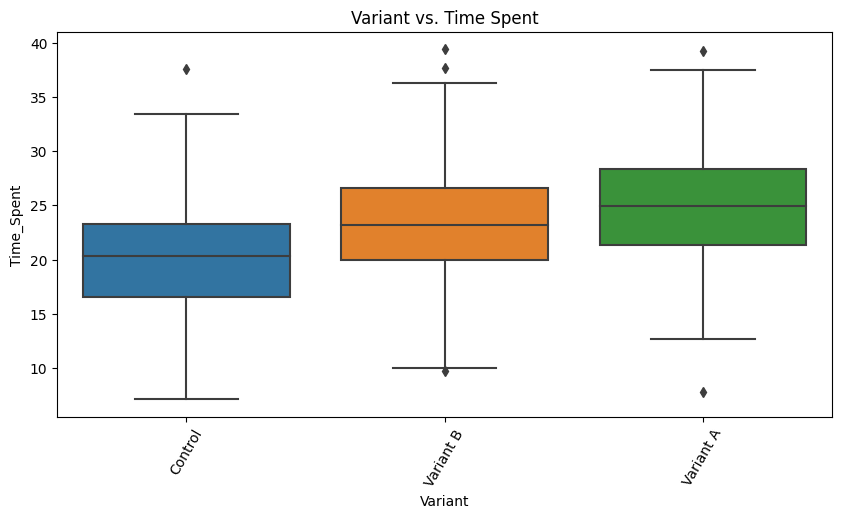

In [9]:
# Variant vs. Time Spent
plt.figure(figsize=(10,5))
sns.boxplot(x='Variant', y='Time_Spent', data=df)
plt.tick_params(axis='x', rotation=60)
plt.title('Variant vs. Time Spent')
plt.show()

The difference between control group and variant groups are apparent. But the association of each variant groups on CTR or time spent are similar. For instance, the median of time spent and CTR from Variant A group is the largest while the median of Control group is the lowest for both CTR and time spent. This indicates that "Variant A" feature results in  CTR or Time Spent lift, followed by "Variant B".

In [10]:
# linear regression Variant VS CTR
mod1 = ols('CTR ~ Variant', data=df).fit()
print(mod1.params)

Intercept               0.098554
Variant[T.Variant A]    0.021715
Variant[T.Variant B]    0.010379
dtype: float64


$$\text{CTR}=0.098554 + 0.021715 * Variant A + 0.010379*Variant B$$

The average CTR for baseline control group is 0.099. The CTR increases 2% for variant A feature, compared to control group. Similarly, the CTR increase 1% for variant B feature. Therefore, the regression line also shows that variant A results in CTR lifts.

In [11]:
# linear regression Variant VS CTR
mod2 = ols('Time_Spent ~ Variant', data=df).fit()
print(mod2.params)

Intercept               20.070781
Variant[T.Variant A]     4.734766
Variant[T.Variant B]     3.273002
dtype: float64


$$\text{Time_Spent}=20.070781 + 4.734766 * Variant A +  3.273002*Variant B$$

The average time spent for baseline control group is 20 minutes. For variant A feature, users would like to spend about 5 more minutes, compared to control group. Regarding variant B, users stay additional 3 minutes, compare to control group. Therefore, the regression line also shows that variant A results in average time spent lifts.

### Other variables

In [12]:
variant = df['Variant'].unique().tolist()

# create new column to change rate to percentage and update
df['CTR'] = df['CTR'] * 100 

In [210]:
df['CTR'].head(2)

Unnamed: 0
0    8.477599
1    9.685887
Name: CTR, dtype: float64

* Age

In [16]:
# Average Age for each group
for i in range(len(variant)):
  print(f"Average Age for {variant[i]} group: {round(df[df['Variant'] == variant[i]]['Age'].mean(),2)}")

Average Age for Control group: 40.89
Average Age for Variant B group: 41.47
Average Age for Variant A group: 39.78


<ipython-input-223-151b8b5c3edf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


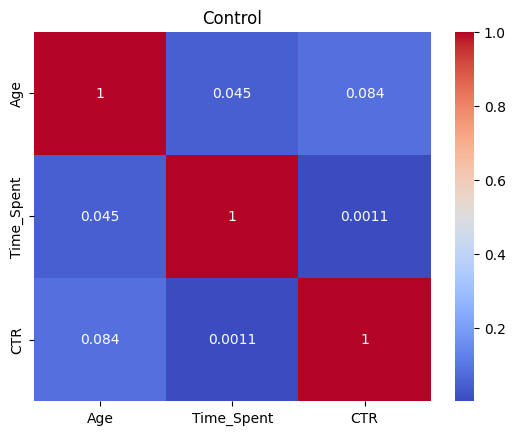

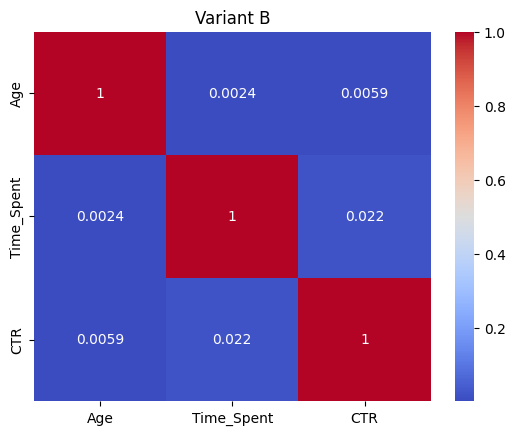

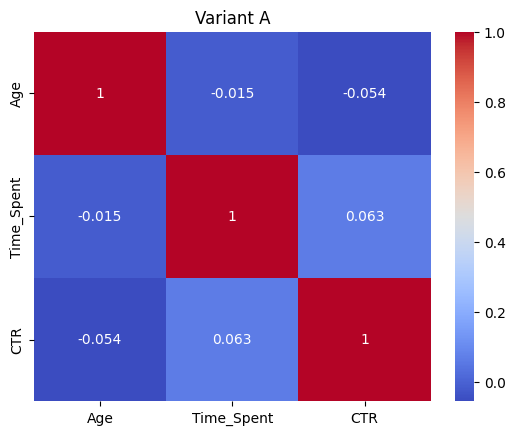

In [223]:
for i in range(len(variant)):
  data = df[df['Variant'] == variant[i]]
  corr_matrix = data.corr()
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
  plt.title(f"{variant[i]}")
  plt.show()

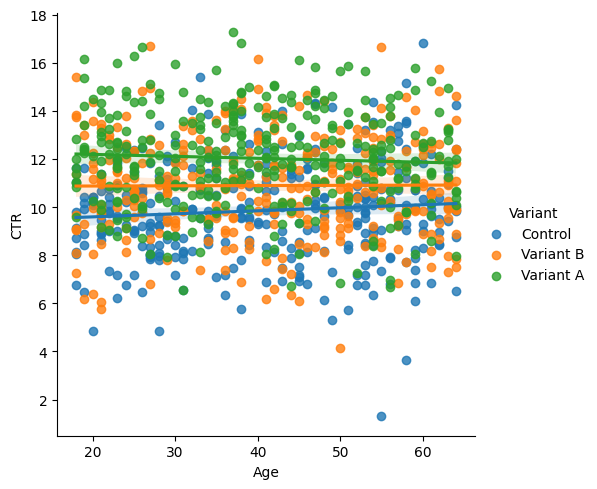

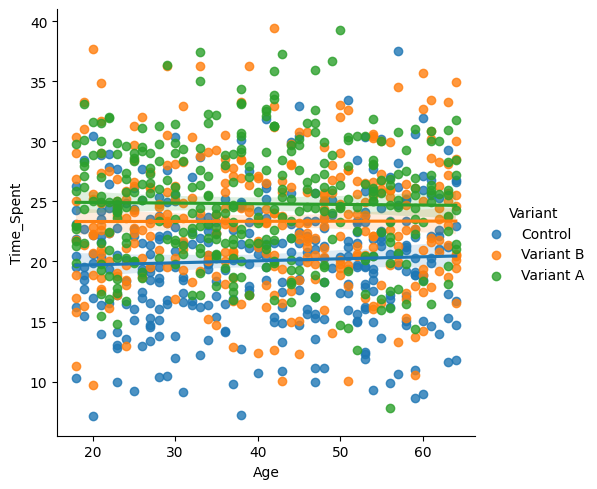

In [220]:
sns.lmplot(data = df, x='Age', y='CTR', hue = 'Variant')
sns.lmplot(data = df, x='Age', y='Time_Spent', hue = 'Variant')

The heatmaps and the line plots both show that the feature of Variant A is not that useful for time spent or CTR lift for the users who are elder though the impacts are not obvious. Feature of the control group has the opposite results that older users would spend more time and higher rate to click. But in all, Variant A has the greatest impact on CTR and Time Spent lift, regardless of age.

* Location

In [ ]:
# Count the number of users in each location under each feature group
for i in range(len(variant)):
  print(f"The number of useres in {variant[i]} group is: \n{df[df['Variant'] == variant[i]]['Location'].value_counts()}")
  print('------------------------------------')

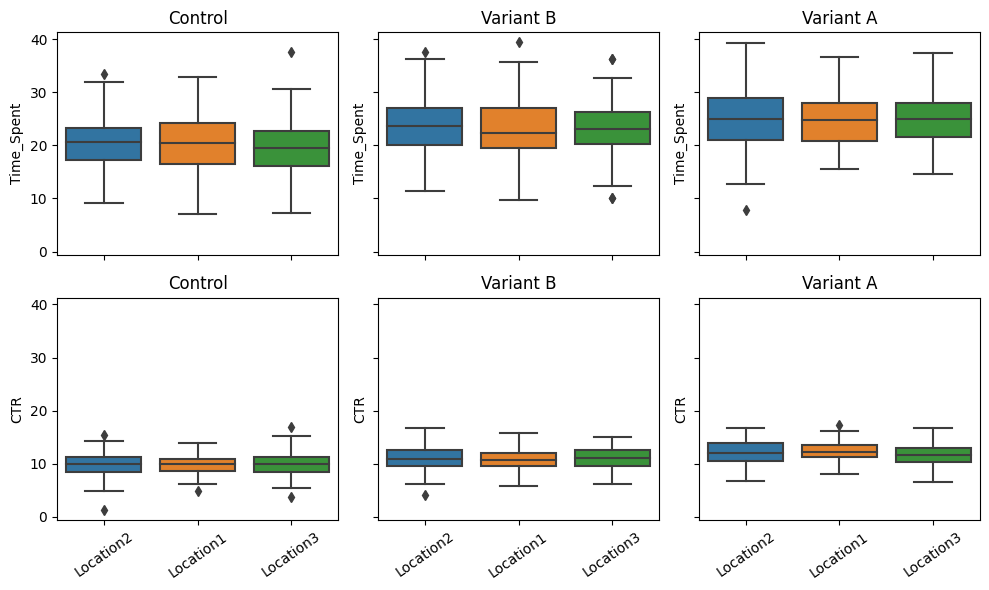

In [216]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharey = True, sharex= True)

for i in range(len(variant)):
    data = df[df['Variant'] == variant[i]]
    for j, response in enumerate(df.columns.tolist()[-2:]):
        ax = axes[j, i]
        sns.boxplot(ax=ax, x="Location", y=response, data=data)
        ax.tick_params(axis='x', rotation=35)
        ax.set_title(f"{variant[i]}")
        ax.set_xlabel('') 
plt.tight_layout()
plt.show()

The feature of Variant A results in the greatest time spent or CTR in all three locations based on the median value and the performances among those locations are similar, followed by Variant B. It is well notice that the time users spent in Variant A group in Location 2 is the largest, compared to other two locations.

* Device

In [ ]:
# Count the number of users using each device under each feature group
for i in range(len(variant)):
  print(f"The number of useres in {variant[i]} group is: \n{df[df['Variant'] == variant[i]]['Device'].value_counts()}")
  print('------------------------------------')

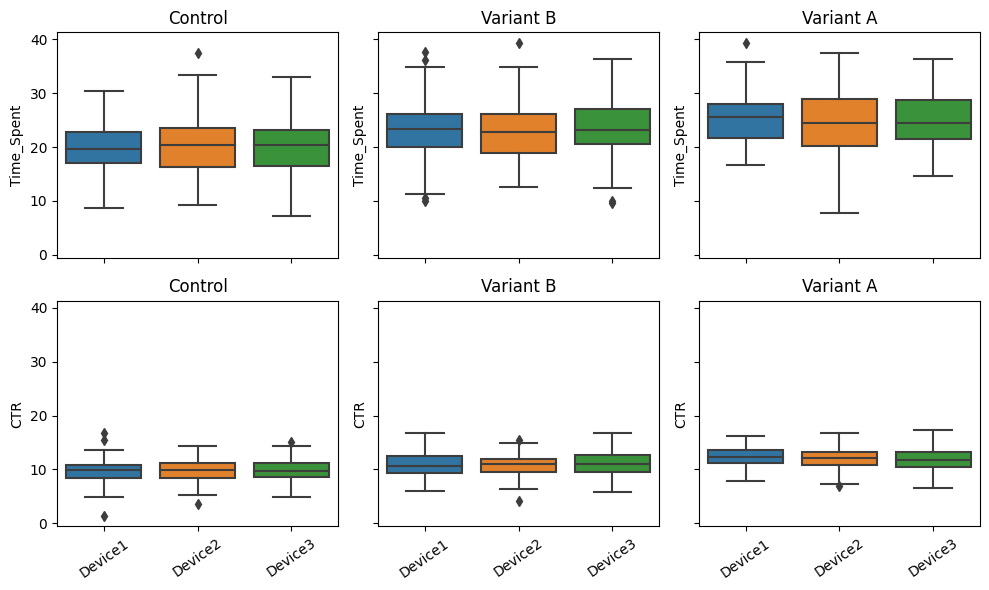

In [203]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharey = True, sharex= True)

for i in range(len(variant)):
    data = df[df['Variant'] == variant[i]]
    for j, response in enumerate(df.columns.tolist()[-2:]):
        ax = axes[j, i]
        sns.boxplot(ax=ax, x="Device", y=response, data=data)
        ax.tick_params(axis='x', rotation=35)
        ax.set_title(f"{variant[i]}")
        ax.set_xlabel('')  

plt.tight_layout()
plt.show()

The feature of Variant A results in the greatest time spent or CTR in all three locations and the performances among those locations are similar, followed by Variant B. However, the right-top plot shows that the difference in time for users using Device 2 under Variant A feature group is obvious. The maximum time the user spent is about 35 minutes while the least time a user spent is lower than 10 minutes.

## 2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.


In [59]:
# split into control, Variant A and Variant B groups
control = df[df['Variant'] == "Control"]
VA = df[df['Variant'] == "Variant A"]
VB = df[df['Variant'] == "Variant B"]

To test if there is a statistically significant difference among Variant A, Variant B and the control group, the following tests choose ANOVA.

* CTR

$H_0: μ_{control} = μ_{VA} = μ_{VB} $  
$H_A: \text{at least one group has mean of CTR different from others}$

where
*   $μ_{control}$ is the mean CTR for control group
*   $μ_{VA}$ is the mean CTR for Variant A
*   $μ_{VB}$ is the mean CTR for Variant B




In [191]:
f_stat, p_val = stats.f_oneway(control['CTR'], VA['CTR'], VB['CTR'])
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 93.588915936227
P-value: 5.638952705781955e-38


Since the P-value is less than significant level of 0.05, we have strong evidence to reject the null hypothesis that the mean CTR for three groups are the same.

* Time Spent

$H_0: μ_{control} = μ_{VA} = μ_{VB} $  
$H_A: \text{at least one group has mean of time spent different from others}$

where
*   $μ_{control}$ is the mean CTR for control group
*   $μ_{VA}$ is the mean CTR for Variant A
*   $μ_{VB}$ is the mean CTR for Variant B




In [192]:
f_stat, p_val = stats.f_oneway(control['Time_Spent'], VA['Time_Spent'], VB['Time_Spent'])
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 75.60840947416146
P-value: 2.676826588910432e-31


Since the P-value is less than significant level of 0.05, we have strong evidence to reject the null hypothesis that the mean Time Spent for three groups are the same.



## 3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 



The feature of Variant A shows the best performance on CTR and Time Spent lift, followed by Variant B. Meanwhile, based on the plots and testing results, the performance difference of features, especially Vairant A, and the control group is apparent. This indicates that the feature of Variant A should be deployed instead of choosing Variant B or sticking with the control group option. However, the difference between each group is relatively small if Variant A is the feature that the product wants to highlight. Besides, other variables such as age and device may influence the lift of time spent or CTR if Variant A is deployed. Therefore, some further experiments and testing may be needed to have a better user experience.


## 4. Create a roll-out plan. How quickly will you introduce the feature to your audience?



1. Identify the problem: Can changes to an existing feature increase the Click-Through-Rate and Average Time Spent on a product?
2.   Define the hypothesis: The performance on CTR and Time spent for Variant A, Variant B and control (existing) features are the same (null hypothesis). At least one group has a different performance on CTR and Time spent. (Alternative hypothesis).
3.   Define the primary metrics: Increment in CTR and average time spent.
4.   Decide on a significance level of 0.05. If the p-value is less than 0.05, there is evidence to reject the null hypothesis.
5.   Estimate the required sample size and assign subjects. Collect data and ensure selected users have similar profiles. For instance, the average ages for the three groups here are all around 40 years old. 
6.   Run the test. Here using the ANOVA test since there are three groups that needed to be compared the difference in mean of CTR and time spent.
7.   Analyze the results. The experiment shows that Variant A has the greatest impact on CTR and average time spent lift. However, some concerns are mentioned in question 3 as well. Therefore, in order to have the best user performance, another experiment may be conducted starting from step 1 again.

Based on this experiment, the ANOVA test shows that the performances of feature groups are different from the control group with an extremely small p-value. The experiment could be ended at this stage which would take around 1-2 weeks to run the whole process except the design duration. But if additional experiment is needed, the time would be longer.